## 0. Import Libraries

In [1]:
from glob import glob
from metpy.units import units
from shapely.geometry import mapping
from matplotlib.patches import Patch
from cartopy.feature import ShapelyFeature
from collections import Counter
from matplotlib.patches import Patch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import geopandas as gpd
import seaborn as sns
import cartopy.io.shapereader as shpreader 

import rioxarray
import cartopy
import matplotlib
import proplot

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/__init__.py:30: ProplotWarning: Found conflicting default user proplot folders at '/home/donmezk16/.proplot' and '/home/donmezk16/.config/proplot'. Ignoring the second one.
  from .config import *  # noqa: F401 F403
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/__init__.py:30: ProplotWarning: Found conflicting default user proplot folders at '/home/donmezk16/.proplot' and '/home/donmezk16/.config/proplot'. Ignoring the second one.
  from .config import *  # noqa: F401 F403
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/__init__.py:30: Propl

## 1. Parameters

In [2]:
# general path
path_general = 'data'
name_var = 'cbh' # tp, t2m, blh, cbh

## 2. Open Data

UMD GLCF GLCDS lc: land cover data

### 2.1 LU Data

In [3]:
data_lu = rioxarray.open_rasterio(fr'{path_general}/land_use_data.tiff').squeeze()

In [4]:
data_lu.rio.crs

CRS.from_epsg(4326)

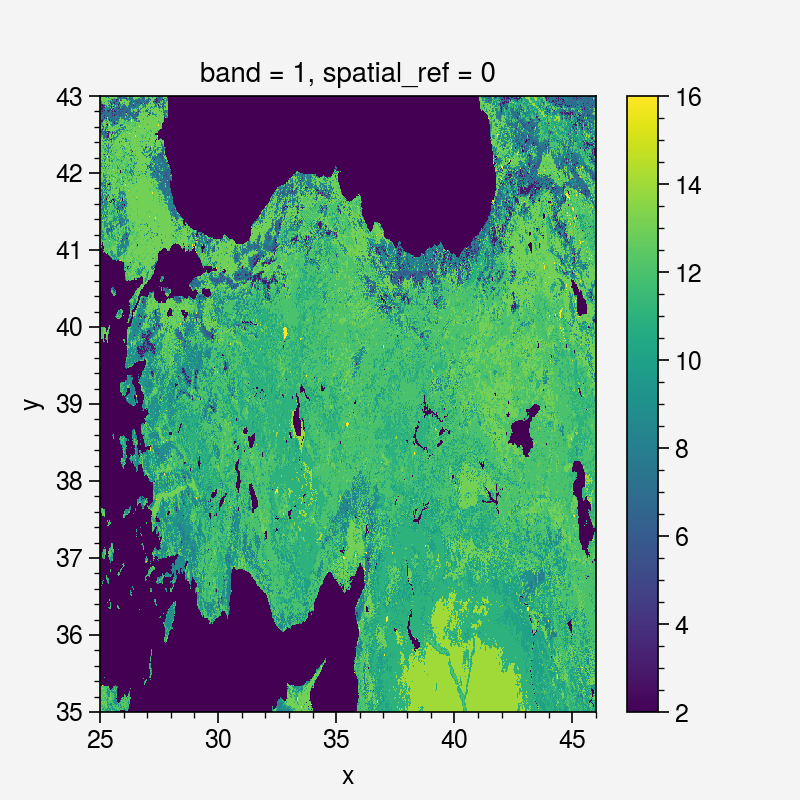

In [5]:
data_lu.plot()

### 2.2 ERA5 Data

In [6]:
data_sample = xr.open_dataset(fr'{path_general}/clipped_hourly_spatial_{name_var}.nc')[name_var]

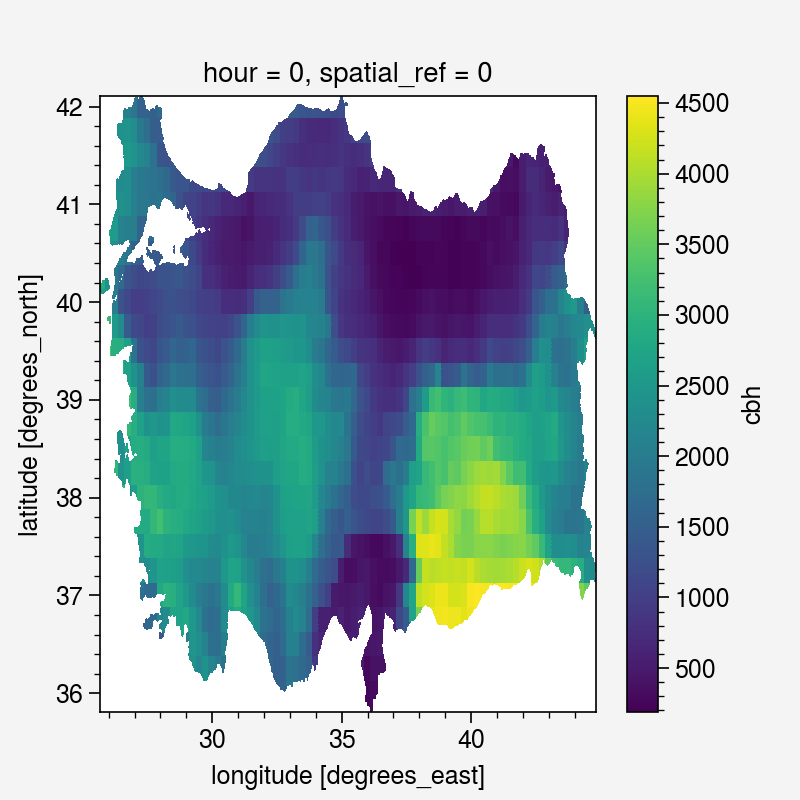

In [7]:
data_sample[0].plot()

## 3. Metadata Definition

In [8]:
def define_index_correspondence():
    
    indexes = {
        'water' : np.arange(0,3), # 1 to 11 included
        'Evergreen Needleleaf Forest' : np.arange(3,4), # 12 to 22 included
        'Evergreen Broadleaf Forest' : np.arange(4,5), # 23 to 34 included
        'Deciduous Needleleaf Forest' : np.arange(5,6), # 35 to 39 included
        'Deciduous Broadleaf Forest' : np.arange(6,7), # 40 to 45 included
        'Mixed Forest': np.arange(7,8), # all grids
        'Woodland': np.arange(8,9), # all but not water
        'Wooded Grassland': np.arange(9,10), # all but not water
        'Closed Shrubland': np.arange(10,11), # all but not water
        'Open Shrubland': np.arange(11,12), # all but not water
        'Grassland': np.arange(12,13), # all but not water
        'Cropland': np.arange(13,14), # all but not water
        'Bare Ground': np.arange(14, 15), # all but not water
        'Urban and Built-up': np.arange(15, 17), # all but not water
    }
    
    return indexes

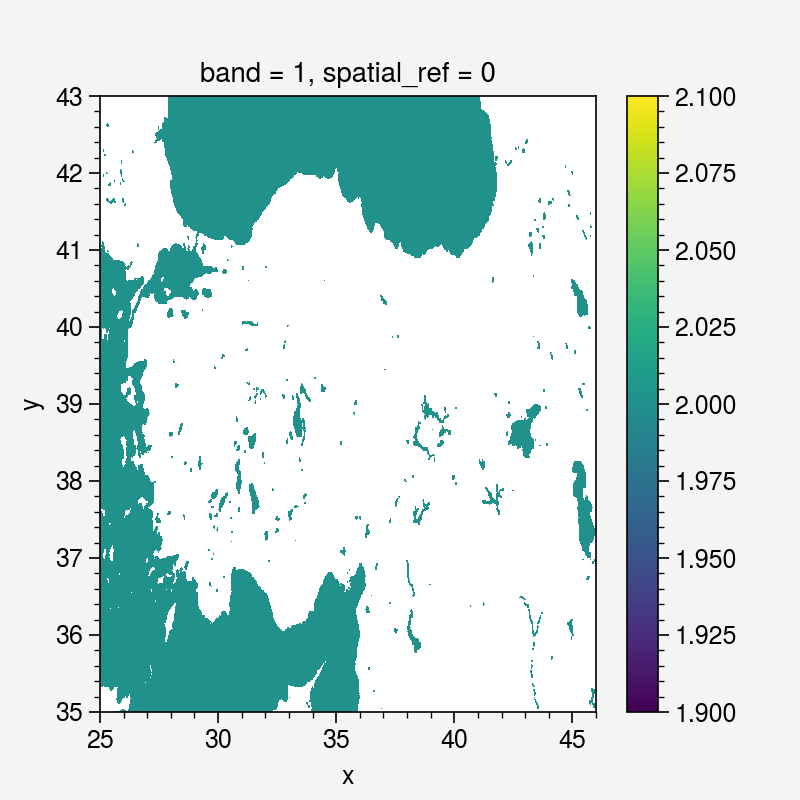

In [9]:
# define land-use index correspondence of name
indexes = define_index_correspondence()
index = 'water'

data_lu.where(data_lu.isin(indexes[index])).plot()

## 4. Filter by Land Use

In [10]:
dict_lu_mask = {}

for index in list(indexes.keys()):
    
    if index not in ['Evergreen Broadleaf Forest',
                     'Deciduous Needleleaf Forest',
                    ]:
        data_sample_tr_reshaped = data_sample.where(data_lu.isin(indexes[index])).values.reshape(-1)
        data_sample_tr_notisnan = data_sample_tr_reshaped[~np.isnan(data_sample_tr_reshaped)]
        
        # assign data
        dict_lu_mask[index] = data_sample_tr_notisnan
        
        print('done', index)

done water
done Evergreen Needleleaf Forest
done Deciduous Broadleaf Forest
done Mixed Forest
done Woodland
done Wooded Grassland
done Closed Shrubland
done Open Shrubland
done Grassland
done Cropland
done Bare Ground
done Urban and Built-up


## 5. Visualize

### 5.1 Options

In [11]:
var_unit_dict = {
    'tp':'mm',
    't2m':'°C',
    'blh':'m',
    'cbh':'m'
}

var_name_dict = {
    'tp':'Total Precipitation',
    't2m':'2m Temperature',
    'blh':'Boundary Layer Height',
    'cbh':'Cloud Base Height'
}

In [12]:
cb_list = [
    '#9be3ff',
    '#009200',
    '#00b900',
    '#006900',
    '#009d86',
    '#70cdc0',
    '#c8bb27',
    '#929292',
    '#797100',
    '#b3b098',
    '#fcee81',
    '#f00',
]

labels = ['water', 'Evergreen Needleleaf Forest',
       'Deciduous Broadleaf Forest', 'Mixed Forest', 'Woodland',
       'Wooded Grassland', 'Closed Shrubland', 'Open Shrubland',
       'Grassland', 'Cropland', 'Bare Ground', 'Urban and Built-up']

cmap = matplotlib.colors.ListedColormap(cb_list)

### 5.1 Plot

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/donmezk16/Downlo

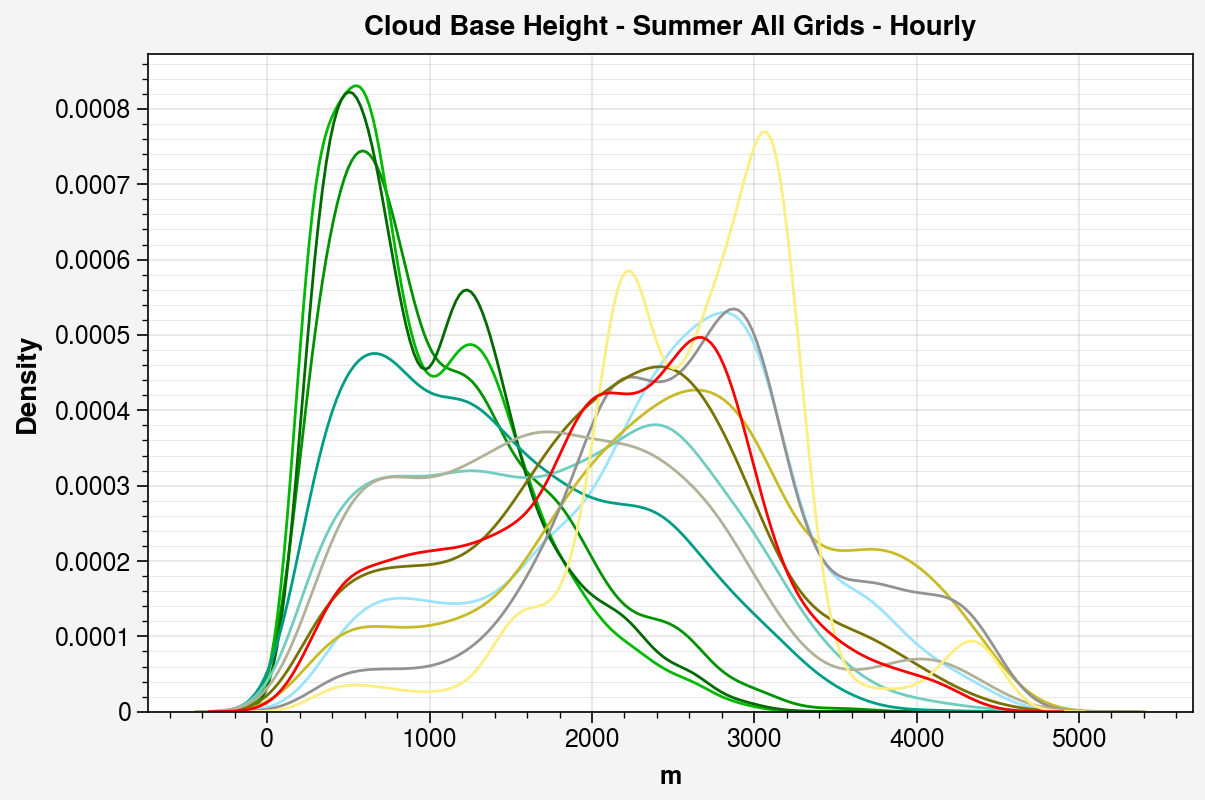

In [13]:
# fig features
fig_array = [[1, 1],
            ]
graphic_no = 1

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                            #aspect=1,
                            figsize=(6.025,4),
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=0.50,
                            wspace=0.4,
                            sharey=0)

bw_param = {
    'tp':None,
    't2m':0.2,
    'blh':0.2,
    'cbh':0.2
}

for i, label in enumerate(labels):
    sns.kdeplot(dict_lu_mask[label], 
                color=cb_list[i], 
                linewidth=1., 
                ax=axs, 
                bw=bw_param[name_var],
                legend=False)

custom_lines = []
for i, cb_col in enumerate(cb_list):

    custom_lines.append(Patch(facecolor=cb_col,
                               edgecolor='k',
                               label=labels[i]))
    
axs.format(ylabel='', xlabel=f'{var_unit_dict[name_var]}',
           ygridminor=True, ygrid=True, #title=provinces[i],
           titleloc='ll',
           xlabelweight='bold'
           )

axs.format(rowlabels=['Density'],
           collabels=[fr'{var_name_dict[name_var]} - Summer All Grids - Hourly']
           )

#save figure
plt.savefig(fr'pictures/{name_var}_summer_allgrids_hourly_kde.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=300)